## Data Exploration

In [1]:
#Loading in relevant libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Loading the dataset and taking a brief glance: 
csv_path = "../clean-datasets/primary.csv"

df = pd.read_csv(csv_path)

df.head()

name                                      tagline  \
0  Valera Health     Your Path to Wellness, Just a Click Away   
1         Bestow                  Protecting Life, Simplified   
2        PlainID  Secure Your Identity, Empower Your Business   
3       Snapcart  Innovating Connections, Empowering Insights   
4          slice                  Experience Money, Mastered.   

                                             summary  \
0  Valera Health, based in New York, is a mental ...   
1  Bestow is a Texas-based company that offers fa...   
2  PlainID is a company based in Tel Aviv that sp...   
3  Snapcart is a commercial company based in Jaka...   
4  slice is a financial technology company based ...   

                                         description  year_founded  \
0  Valera Health operates as a tele-mental health...        2015.0   
1  Bestow operates as an insurance technology com...        2017.0   
2  PlainID is an Identity Security Posture Manage...        2014.0   
3  Snapcart specializes in real-time offline shop...        2015.0   
4  Slice operates as a financial technology compa...        2016.0   

                    website      city    region        country postal_code  \
0  https://valerahealth.com  Brooklyn  New York  United States       11249   
1        https://bestow.com    Dallas     Texas  United States       75226   
2       https://plainid.com  Tel Aviv       NaN         Israel     6789139   
3   https://snapcart.global   Jakarta       NaN      Indonesia       12940   
4       https://sliceit.com       NaN     Assam          India      781028   

   ...                                           keywords investor_count  \
0  ...  ['Mental Health Care', 'Telemedicine', 'Health...             20   
1  ...  ['Insurance', 'Technology', 'Healthcare', 'Fin...              8   
2  ...  ['Cybersecurity', 'Identity Management', 'Data...             10   
3  ...  ['Artificial Intelligence & Machine Learning',...              9   
4  ...  ['FinTech', 'ConsumerTech', 'E-Commerce', 'Dig...             36   

   mosaic_change  funding_total_millions  last_funding_millions  \
0         -117.0                   76.32                   9.12   
1         -119.0                  138.10                  70.00   
2         -120.0                   99.00                  75.00   
3          124.0                   14.70                  10.00   
4          -76.0                  390.50                   7.77   

   funding_count  last_funding_type last_funding_date  \
0              8      Series B - II        2024-04-09   
1              5           Series C        2020-12-16   
2              5           Series C        2021-12-21   
3              4           Series A        2017-10-25   
4             21        Debt - VIII        2024-07-19   

                                           sentiment  \
0  {'sentimentScore': 100, 'cntPositive': 15, 'cn...   
1  {'sentimentScore': 90, 'cntPositive': 48, 'cnt...   
2  {'sentimentScore': 100, 'cntPositive': 21, 'cn...   
3  {'sentimentScore': 92, 'cntPositive': 7, 'cntN...   
4  {'sentimentScore': 89, 'cntPositive': 36, 'cnt...   

                                            articles  
0  [{'contentId': 'ab325015a7bbae7beefc4833b73696...  
1  [{'contentId': 'b633176d-6378-46d0-9b15-d2b611...  
2  [{'contentId': '29c3c127-069d-4be7-aaf6-3a89bb...  
3  [{'contentId': '5ffd28ae-d4f3-46e2-a3b1-526c96...  
4  [{'contentId': 'ce75fa10-6d0f-45d5-bf66-2532b8...  

[5 rows x 21 columns]

### Examining Columns & Attribute Types

The below table shows a summary of the columns of the dataset, how many non-null entries for each entry exist, and the type of each column. Most are of type 'object' - these are either strings, lists, or dictionaries containing different kinds of data. Numerical columns are either of type float or int. A brief description of each column is as follows: 
- name: The name of the startup.
- tagline: The startup's unique tagline, or short phrase or slogan further identifying/encapsulating their business. 
- summary: An AI-generated summary of the startup.
- description: A brief human-generated text entry describing the startup.
- year_founded: The year the startup was founded
- website: The URL to the startup's website
- city: The city the startup is based in. 
- region: The region the startup is based in. 
- country: The country the startup is based in. 
- postal_code: The postal address for each startup.
- concepts: A list of brief important phrases encapsulating the startup. 
- keywords: A list of words corresponding to the industry of the startup. 
- investor_count: The number of current investors in the startup. 
- mosaic_change: CB Insights' Mosaic Score change. CB Insights uses data and their own models to calculate this score, showing their evaluation of a business. This column shows the change in value of this score (**NOTE**: it is unknown over what time interval this change was calculated over)
- funding_total_millions: The total amount, in millions of US Dollars, of funding for the startup. 
- last_funding_millions: The most recent amount of funding the startup received, in millions of US Dollars. 
- funding_count: The number of rounds of funding the startup has undergone. 
- last_funding_type: The most recent type of funding the startup received - one of 35 main types
- last_funding_date: The most recent date the startup received funds
- sentiment: A large, complex JSON-like string that encapsulates detailed sentiment analysis data for each startup. Contains summary sentiment metrics (sentimentScore, cntPositive, cntNeutral, cntNegative), and more detailed sentiment data (scoreDistribution, timeline, impact)
- articles: A large, complex JSON-like string that contains information on the articles used to perform sentiment analysis in the previous column. Contains information such as article title, publication date, URL, summary, etc.


In [2]:
#Viewing the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    5509 non-null   object 
 1   tagline                 5509 non-null   object 
 2   summary                 5509 non-null   object 
 3   description             5509 non-null   object 
 4   year_founded            5509 non-null   float64
 5   website                 5509 non-null   object 
 6   city                    5181 non-null   object 
 7   region                  4108 non-null   object 
 8   country                 5509 non-null   object 
 9   postal_code             5140 non-null   object 
 10  concepts                5509 non-null   object 
 11  keywords                5509 non-null   object 
 12  investor_count          5509 non-null   int64  
 13  mosaic_change           5509 non-null   float64
 14  funding_total_millions  5509 non-null   

Below is a table describing summary statistics of all numerical columns in the dataset. The year_founded's summary statistics are not meaningful, but every other numerical column's statistics are meaningful. Note the mosaic change can have negative values, with a negative mean, since this is a change in value statistic. We note some extremely high max values for funding_total_millions and last_funding_millions, and from this summary we can see outliers will be present for every attribute. We will examine visualizations of these summary statistics through boxplots below. 

Note the means of each relevant numerical column: 
- investor_count $\approx$ 11 - average of 11 investors per startup. 
- mosaic change $\approx$ -21 - the average change in mosaic score. Though we do not know the time interval for the measurement of this change, we know that, as of the time this data was scraped and aggregated, CB Insights' average startup decreased in evaluation. 
- funding_total_millions $\approx$ 114 - the average total funding for a startup was 114 million USD. 
- last_funding_millions $\approx$ 36 - the average most recent funding amount for a startup was 36 million USD. 
- funding_count $\approx$ 6 - the average number of rounds of funding was a little less than 6 for each startup. 

In [3]:
#Viewing summary statistics of all numerical columns. 
df.describe()

year_founded  investor_count  mosaic_change  funding_total_millions  \
count   5509.000000     5509.000000    5509.000000             5509.000000   
mean    2016.638591       11.342167     -21.827373              114.143834   
std        3.225585        6.982081     102.878693              567.506900   
min     1990.000000        1.000000    -354.000000                0.040000   
25%     2015.000000        7.000000     -75.000000               12.710000   
50%     2017.000000       10.000000     -38.000000               31.000000   
75%     2019.000000       15.000000      17.000000               89.930000   
max     2023.000000       79.000000     506.000000            25646.000000   

       last_funding_millions  funding_count  
count            5509.000000    5509.000000  
mean               36.887740       5.627882  
std               125.525411       3.219831  
min                 0.010000       1.000000  
25%                 7.500000       3.000000  
50%                13.000000       5.000000  
75%                30.000000       7.000000  
max              6500.000000      39.000000

### Boxplots

Boxplots were created for each relevant numerical variable to get a visual indication of central tendency and spread of each attribute: 

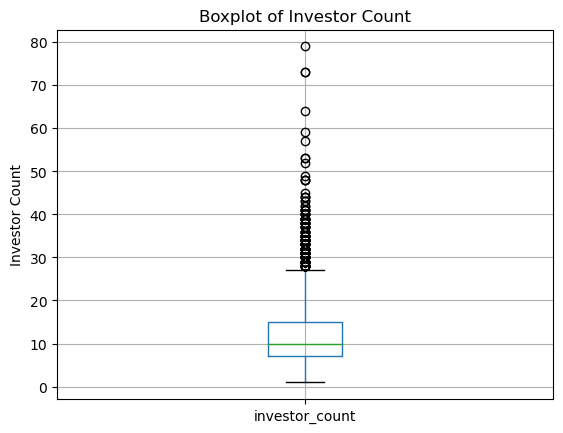

In [4]:
# Create a boxplot for the 'investor_count' column
df.boxplot(column='investor_count')

# Add a title and labels
plt.title('Boxplot of Investor Count')
plt.ylabel('Investor Count')

# Displaying the plot
plt.show()

The above boxplot shows a median of 10 investors, with the middle 50% of the data lying fairly close to the median, a low whisker of 1 and a high whisker a bit higer than 25. The data appears somewhat symmetrically spread with a bit of a right skew towards higher numbers of investors, and a significant number of high outliers.

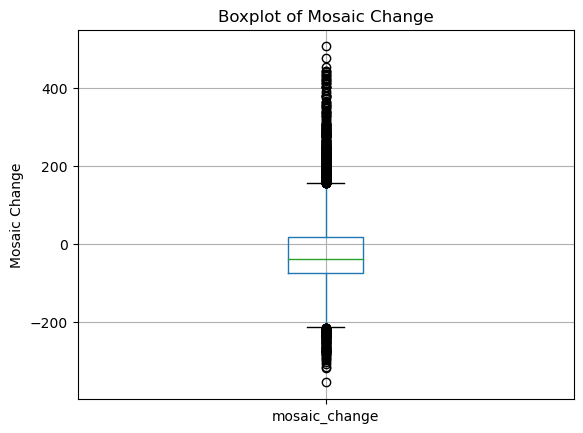

In [5]:
df.boxplot(column='mosaic_change')

plt.title('Boxplot of Mosaic Change')
plt.ylabel('Mosaic Change')

plt.show()

The above boxplot shows a smaller negative mean, and a very symmetrical looking spread, with a very small right skew. There are a significant amount of both high and low outliers. 

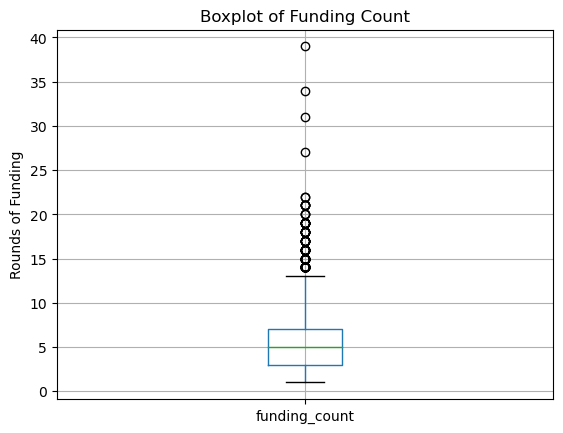

In [6]:
df.boxplot(column='funding_count')

plt.title('Boxplot of Funding Count')
plt.ylabel('Rounds of Funding')

plt.show()

The above boxplot shows a heavy right skew, but a symmetrical middle 50% of the data, with a median of 5 (close to the mean) of the number of rounds of funding. There are high outliers but less outliers than in previous boxplots. 

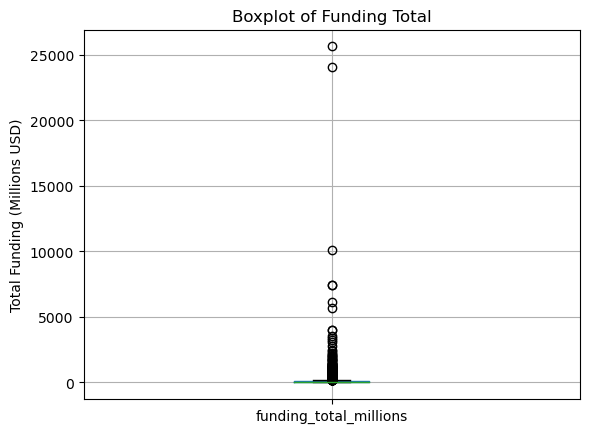

In [7]:
df.boxplot(column='funding_total_millions')

plt.title('Boxplot of Funding Total')
plt.ylabel('Total Funding (Millions USD)')

plt.show()

The above boxplot is undiscernible because of the significant high outliers. Removal of the top 50 outliers was conducted and the data replotted: 

In [8]:
# Get the indices of the rows with the two highest values in 'funding_total_millions'
indices_to_drop = df.nlargest(50, 'funding_total_millions').index

# Drop those rows from the DataFrame
df2 = df.drop(indices_to_drop)

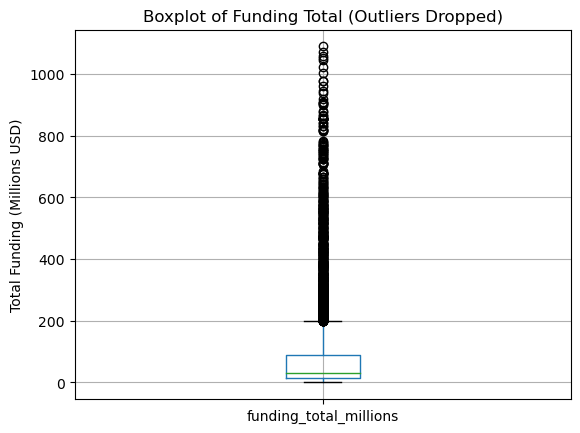

In [9]:
df2.boxplot(column='funding_total_millions')

plt.title('Boxplot of Funding Total (Outliers Dropped)')
plt.ylabel('Total Funding (Millions USD)')

plt.show()

This boxplot is now discernible due to removing outliers. We see a very small median with a heavy right skew, and still a significant number of very high outliers. The lowest whisker is close to 0 and not below. 

In [17]:
import ast

# Function to extract 'sentimentScore' from the 'sentiment' string
def extract_sentiment_score(sentiment_str):
    try:
        sentiment_dict = ast.literal_eval(sentiment_str)
        # Extract the 'sentimentScore'
        return sentiment_dict.get('sentimentScore', None)
    except (ValueError, SyntaxError):
        return None

# Apply the function to the 'sentiment' column and create a new column 'sentimentScore'
df2['sentimentScore'] = df2['sentiment'].apply(extract_sentiment_score)

After sentiment score was extracted, summary statistics were generated into the table below. We see a very high mean of around 92, indicating that most sentiment scores are very high. This is likely due to bias in selecting startups that were able to gain high amounts of funding (with a mean of 114 million USD). 

In [11]:
df2_sentiment = df2['sentimentScore']
df2_sentiment.describe()

count    5459.000000
mean       92.501008
std        10.536982
min         5.000000
25%        90.000000
50%        96.000000
75%       100.000000
max       100.000000
Name: sentimentScore, dtype: float64

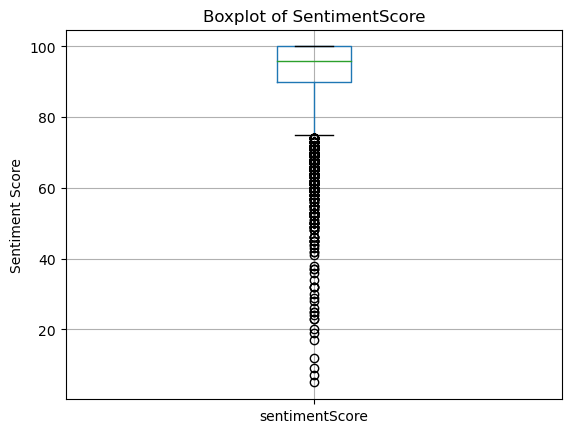

In [12]:
df2.boxplot(column='sentimentScore')

plt.title('Boxplot of SentimentScore')
plt.ylabel('Sentiment Score')

plt.show()

This boxplot shows most of the data being very close to 100. There is a strong left skew to this data and plentiful low outliers. 

### Histograms

Histograms were created for each relevant numerical variable to get a visual sense of the distribution of each attribute: 

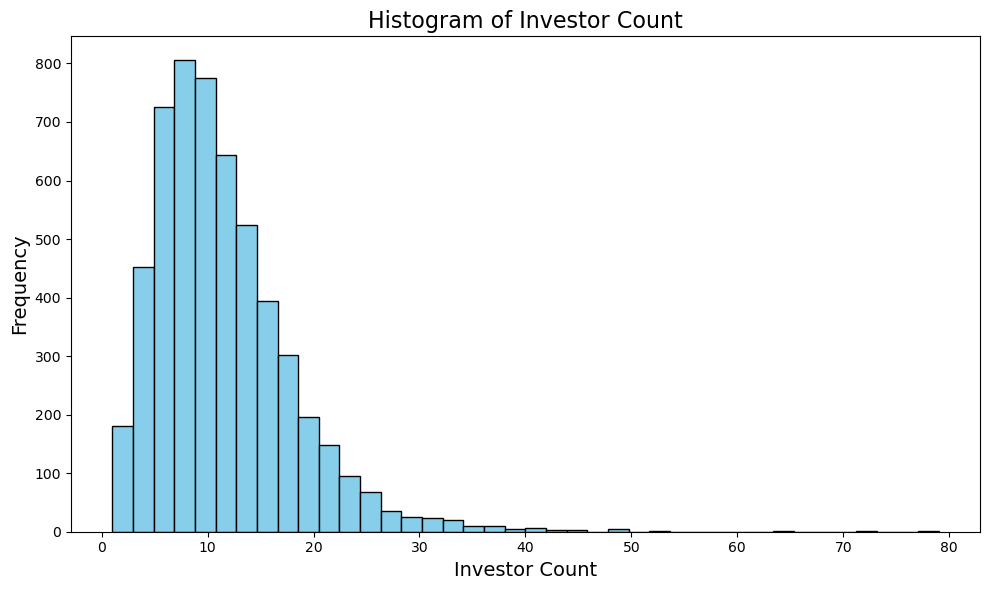

In [13]:
# Create a histogram of the 'investor_count' column
plt.figure(figsize=(10, 6))
plt.hist(df2['investor_count'], bins=40, edgecolor='black', color='skyblue')

# Add a title and labels
plt.title('Histogram of Investor Count', fontsize=16)
plt.xlabel('Investor Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

We see the histogram of Investor Counts looks mostly normally distributed around the mean/median, with a long right-handed tail.  

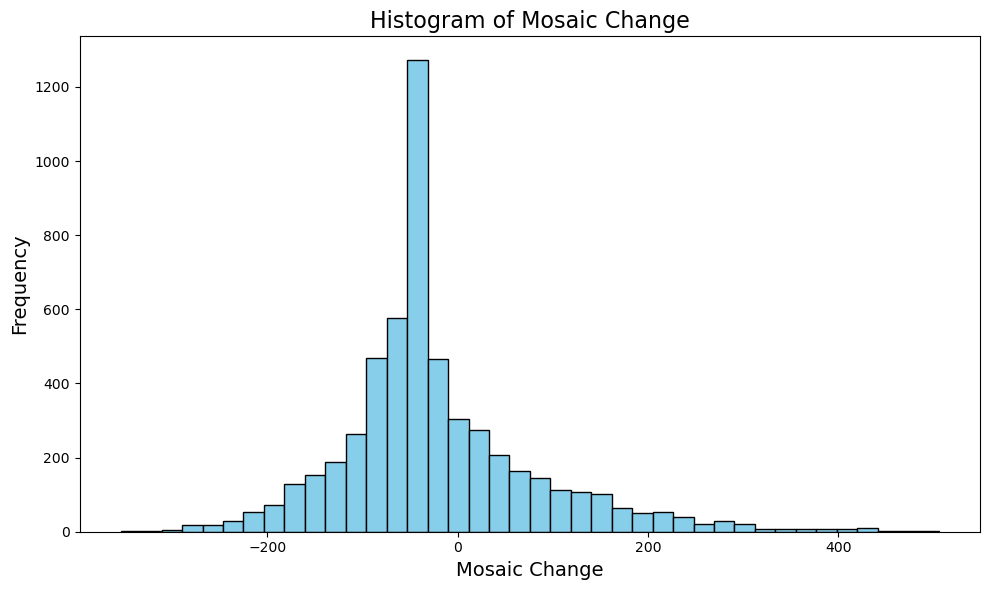

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df2['mosaic_change'], bins=40, edgecolor='black', color='skyblue')

# Add a title and labels
plt.title('Histogram of Mosaic Change', fontsize=16)
plt.xlabel('Mosaic Change', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

The histogram of Mosaic Change appears symmetrical and has a very large peak around the mean – there is a slight but noticeable right skew.  

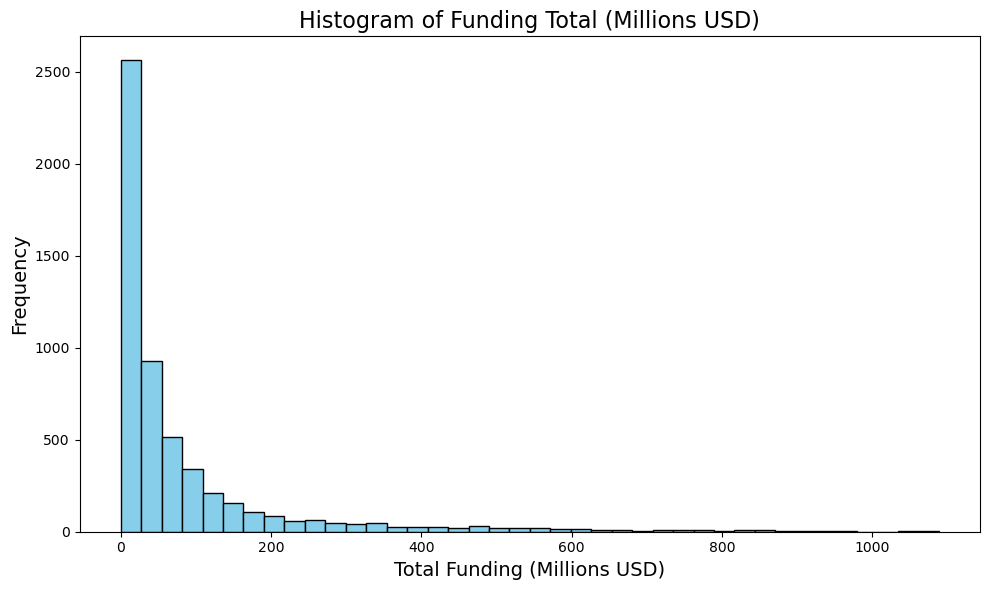

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df2['funding_total_millions'], bins=40, edgecolor='black', color='skyblue')

# Add a title and labels
plt.title('Histogram of Funding Total (Millions USD)', fontsize=16)
plt.xlabel('Total Funding (Millions USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

The histogram of funding total is heavily right skewed. Most of the data is located close to 0. We know the mean is above 100, but this is likely heavily influenced by outliers, making the median a more robust measurement at 31 million. 

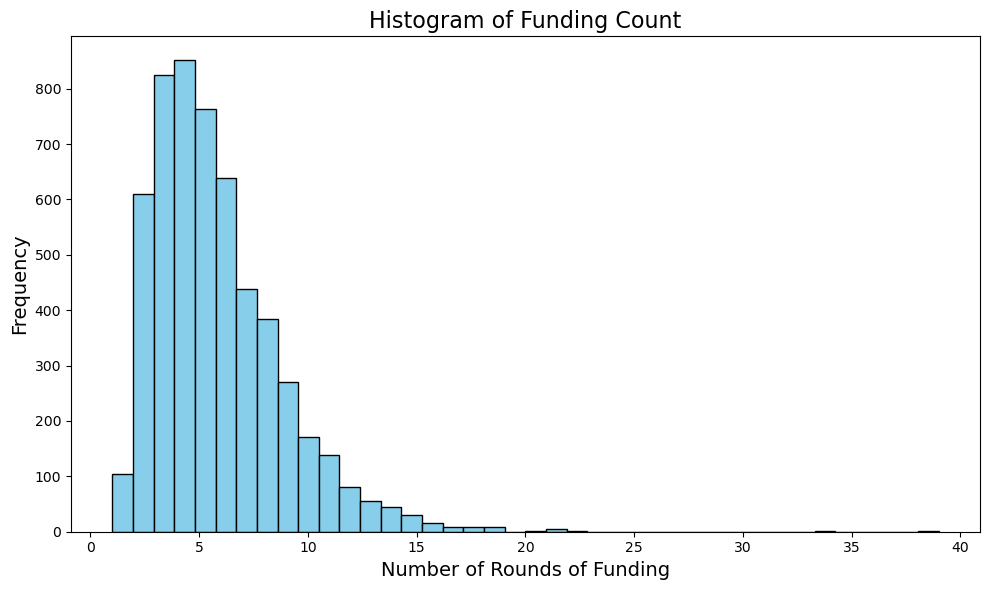

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df2['funding_count'], bins=40, edgecolor='black', color='skyblue')

# Add a title and labels
plt.title('Histogram of Funding Count', fontsize=16)
plt.xlabel('Number of Rounds of Funding', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

The histogram showing the number of rounds of funding looks slightly normal, being unimodal, but also containing a long right-tail.  

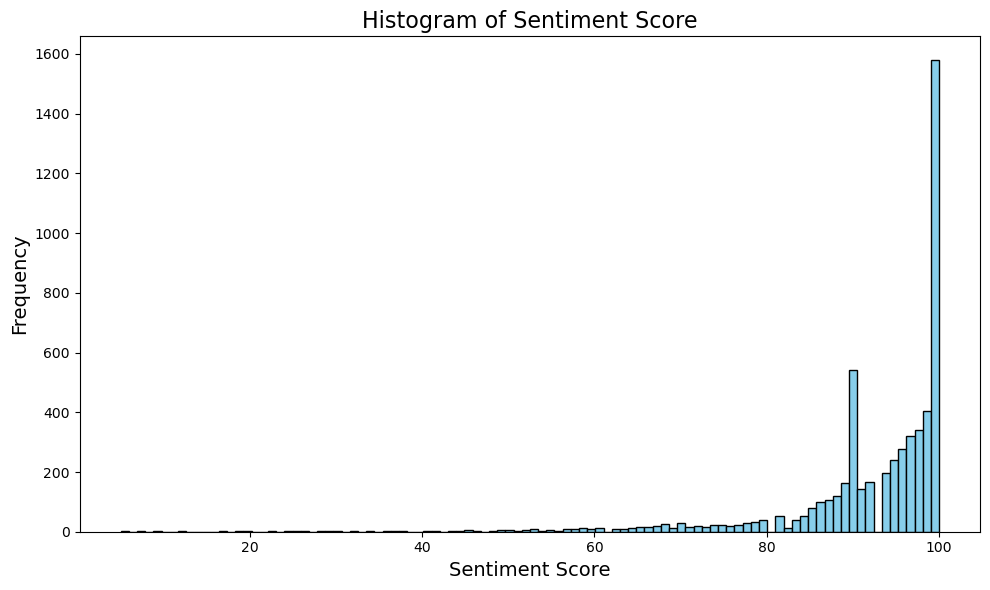

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df2['sentimentScore'], bins=100, edgecolor='black', color='skyblue')

# Add a title and labels
plt.title('Histogram of Sentiment Score', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

The sentiment score histogram shows that most sentiment scores are 100, with a very long left-handed tail. The mean is close to the median even with so many outliers, indicating how many values are directly at 100. It may be worth further investigation to find out how sentiment score is determined and if it has much meaning to our analysis.  

### QQ Plots

QQ-plots were created for each relevant numerical variable to visually determine how normally distributed they were: 

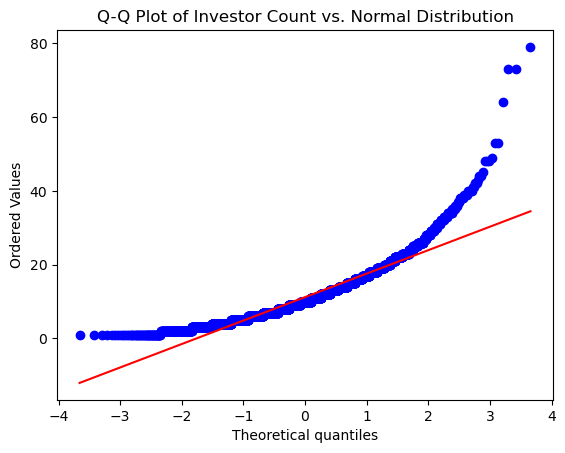

In [35]:
investor_count = df2['investor_count']

# Create a Q-Q plot
stats.probplot(investor_count, dist="norm", plot=plt)

# Show the plot
plt.title('Q-Q Plot of Investor Count vs. Normal Distribution')
plt.show()

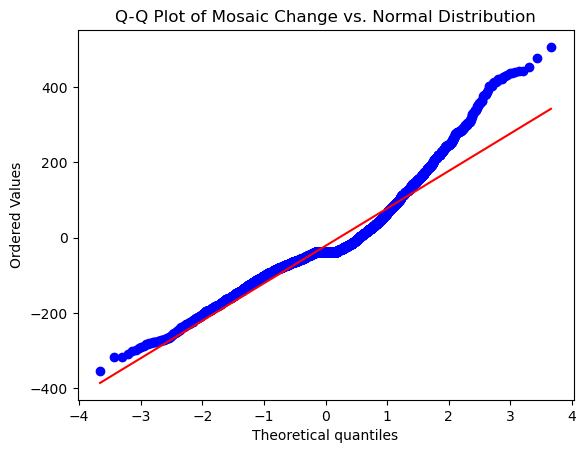

In [36]:
investor_count = df2['mosaic_change']

stats.probplot(investor_count, dist="norm", plot=plt)

plt.title('Q-Q Plot of Mosaic Change vs. Normal Distribution')
plt.show()

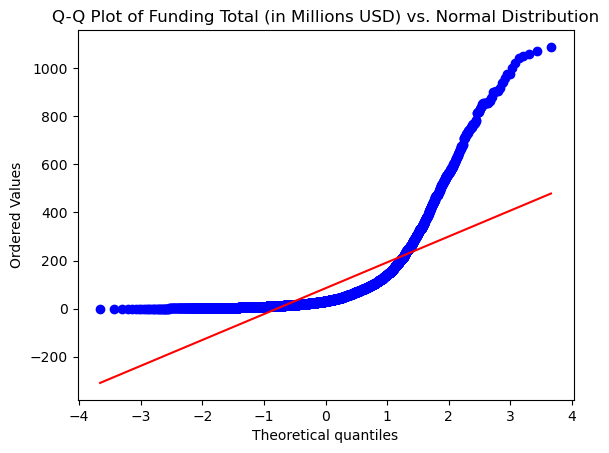

In [37]:
investor_count = df2['funding_total_millions']

stats.probplot(investor_count, dist="norm", plot=plt)

plt.title('Q-Q Plot of Funding Total (in Millions USD) vs. Normal Distribution')
plt.show()

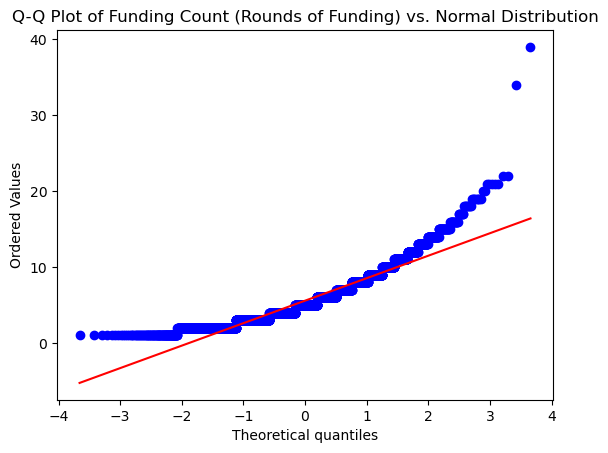

In [38]:
investor_count = df2['funding_count']

stats.probplot(investor_count, dist="norm", plot=plt)

plt.title('Q-Q Plot of Funding Count (Rounds of Funding) vs. Normal Distribution')
plt.show()

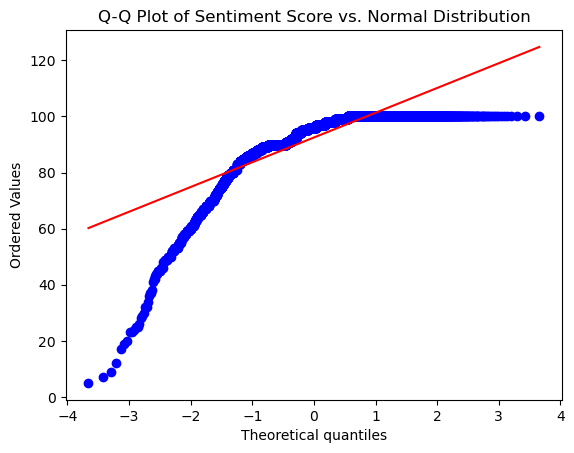

In [39]:
investor_count = df2['sentimentScore']

stats.probplot(investor_count, dist="norm", plot=plt)

plt.title('Q-Q Plot of Sentiment Score vs. Normal Distribution')
plt.show()

We can visually measure how close the distribution of each numerical variable is to the theoretical Normal distribution by how closely they approximate the straight red line in each plot. Each variable shows a marked difference from its distribution and a normal distribution. The Mosaic score is the most normally distributed variable, as it is the closest to the straight line. Both Funding Total and Sentiment Score show the most significant deviations, as we have seen already in above plots - both of these variables had peaks at one end of their value ranges or the other. Investor Count and Funding Count showed distributions in between these two aforementioned plots, not being completely normally distributed by any means, but closer than Funding Total and/or Sentiment Score. The deviation from a Gaussian distribution for each variable indicates that normalization may be worthwhile for all numerical variables. 

In [40]:
# Initialize dictionaries
keyword_sentiment_sum = {}
keyword_count = {}

# Function to clean up keywords by removing brackets and unnecessary spaces
def clean_keyword(keyword):
    return keyword.strip("[]'\" ").strip()

for index, row in df2.iterrows():
    sentiment_score = row['sentimentScore']
    if sentiment_score is None:
        continue  
    
    keywords_str = row['keywords']
    
    
    keywords_list = [clean_keyword(keyword) for keyword in keywords_str.split(',')]
    
    # Update dictionaries
    for keyword in keywords_list:
        if keyword in keyword_sentiment_sum:
            keyword_sentiment_sum[keyword] += sentiment_score
            keyword_count[keyword] += 1
        else:
            keyword_sentiment_sum[keyword] = sentiment_score
            keyword_count[keyword] = 1

# Compute average sentiment scores
keyword_average_sentiment = {}
for keyword in keyword_sentiment_sum:
    total_score = keyword_sentiment_sum[keyword]
    count = keyword_count[keyword]
    average_score = total_score / count
    keyword_average_sentiment[keyword] = average_score

# Create the DataFrame
keyword_sentiment_df = pd.DataFrame({
    'keyword': list(keyword_average_sentiment.keys()),
    'average_sentiment_score': list(keyword_average_sentiment.values()),
    'count': [keyword_count[keyword] for keyword in keyword_average_sentiment.keys()]
})


keyword_sentiment_df = keyword_sentiment_df.sort_values(by='average_sentiment_score', ascending=False).reset_index(drop=True)

keyword_sentiment_df = keyword_sentiment_df.drop_duplicates(subset='keyword', keep='first')

# Display the results
print(keyword_sentiment_df)

                                                keyword  \
0                                  Accounting Solutions   
1                         Data Compression Technologies   
2     you haven't provided a list of company industr...   
3     and *Health & Wellness*. Please provide the sp...   
4                             *Sustainable Agriculture*   
...                                                 ...   
3881                              Aquaculture & Fishing   
3882                                  Writing & Editing   
3883  the list of company industry categories was no...   
3884                         Software & Cloud Computing   
3885  Coworking spaces and social clubs tailored tow...   

      average_sentiment_score  count  
0                       100.0      1  
1                       100.0      1  
2                       100.0      1  
3                       100.0      1  
4                       100.0      1  
...                       ...    ...  
3881              

To understand more about how keywords may have influenced sentiment analysis, we created a separate dataframe that aggregated the average sentiment value score for each industry keyword present in the dataset. We iteratively updated the average sentiment score for each keyword as it was encountered in the dataset, and also counted the instances of each keyword present. Below is a table describing summary statistics for this new dataframe: 

In [41]:
keyword_sentiment_df.describe()

average_sentiment_score        count
count              3886.000000  3886.000000
mean                 92.688602     6.254761
std                   8.839233    33.689138
min                   9.000000     1.000000
25%                  90.000000     1.000000
50%                  95.000000     1.000000
75%                  99.000000     2.000000
max                 100.000000  1105.000000

Again, we see a median and mean very close together, but with values very highly skewed. Many of these values don't have much meaning since they have a very low sample size (the count attribute) of 1. We decided to visualize the average sentiment score of the top 50 most numerous words from the dataset (more would take up too much space): 

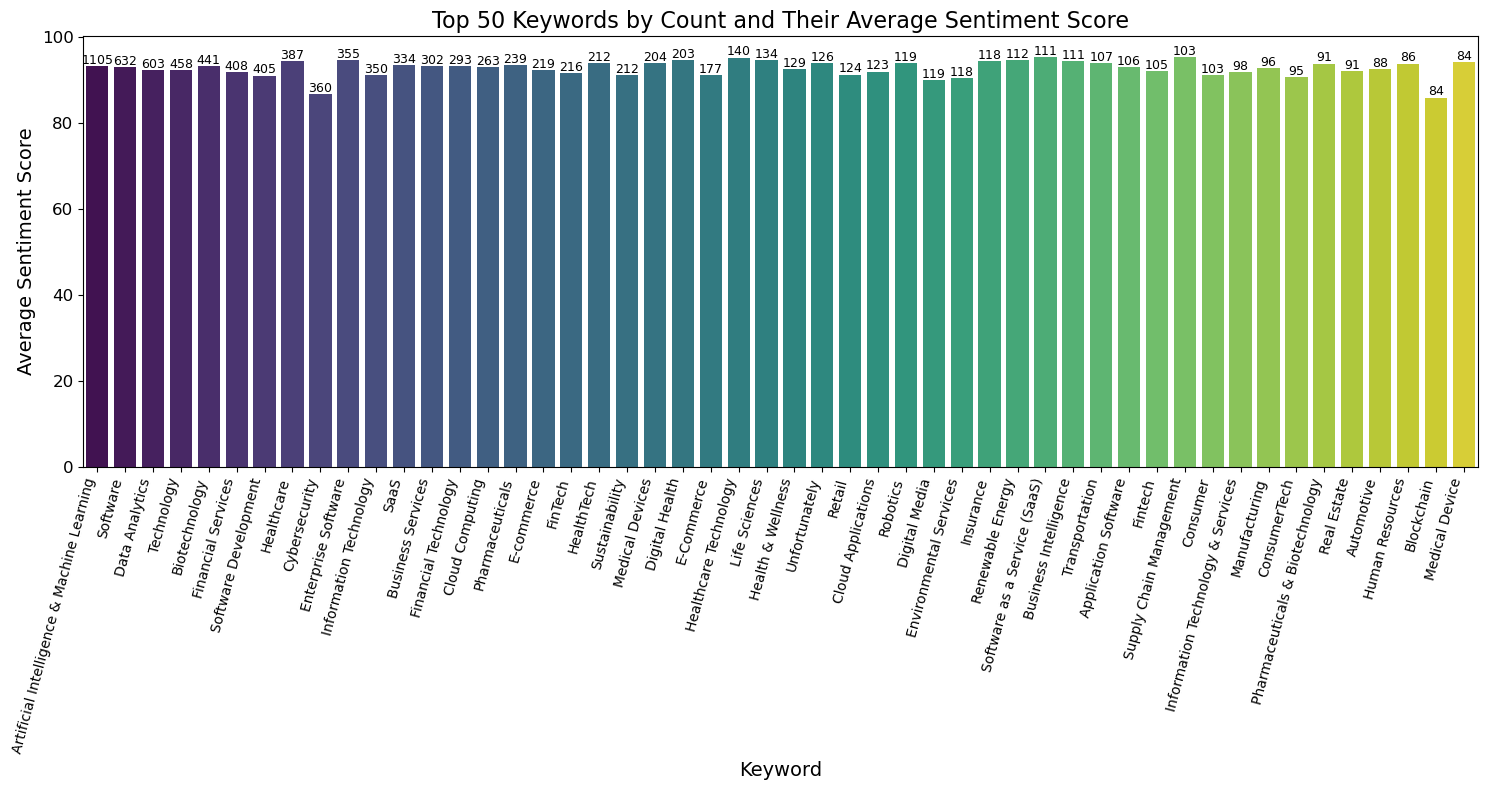

In [42]:

top_50_keywords = keyword_sentiment_df.sort_values(by='count', ascending=False).head(50).reset_index(drop=True)

# Create a Visualization
plt.figure(figsize=(15, 8))

# Create a barplot using Seaborn
sns.barplot(
    x='keyword', 
    y='average_sentiment_score', 
    data=top_50_keywords, 
    palette='viridis'
)

# Annotate each bar with the count value
for index, row in top_50_keywords.iterrows():
    plt.text(
        x=index, 
        y=row['average_sentiment_score'] + 0.5,  # Positioning the text above the bar
        s=f"{row['count']}", 
        ha='center', 
        fontsize=9
    )

plt.title('Top 50 Keywords by Count and Their Average Sentiment Score', fontsize=16)
plt.xlabel('Keyword', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

This graph shows the average sentiment score for each industry keyword and the number of each keyword present in the dataset. We do not see hardly any variation here. This is likely a good indication that our dataset is fairly biased, either in the way that sentiment scores are calculated, or in the fact that every startup in the dataset is very successful, having been able to secure 114 million dollars of funding on average, so it is likely that these industry buzzords associated with the industry of each startup all are attached to very positive sentiments. 

In [43]:
df3 = df2[['investor_count', 'mosaic_change','funding_total_millions','funding_count','sentimentScore']]

### Normalization

Because of the QQ plots, we are aware that our numerical variables are far from being considered normal or Gaussian. This makes normalization of our data a worthwhile endeavor before we construct any models for prediction. Below is a sample of what the data looks like after applying Min-Max normalization to the sentiment score column and Z-score normalization to all other columns: 

In [44]:
# Separate the 'sentimentScore' column for Min-Max normalization
sentiment_score = df3[['sentimentScore']]

# Apply Min-Max Normalization to 'sentimentScore'
min_max_scaler = MinMaxScaler()
sentiment_score_normalized = min_max_scaler.fit_transform(sentiment_score)

# Apply Z-Score Normalization to the other columns
other_columns = df3.drop(columns=['sentimentScore'])
standard_scaler = StandardScaler()
other_columns_standardized = standard_scaler.fit_transform(other_columns)

# Combine the normalized 'sentimentScore' with the standardized other columns
df3_normalized = pd.DataFrame(other_columns_standardized, columns=other_columns.columns)
df3_normalized['sentimentScore'] = sentiment_score_normalized

# Display the resulting dataframe
df3_normalized.head()

investor_count  mosaic_change  funding_total_millions  funding_count  \
0        1.304661      -0.920671               -0.059137       0.776011   
1       -0.475430      -0.940042                0.378539      -0.181910   
2       -0.178748      -0.949727                0.101538      -0.181910   
3       -0.327089       1.413522               -0.495679      -0.501217   
4        3.678116      -0.523568                2.166649       4.927001   

   sentimentScore  
0        1.000000  
1        0.894737  
2        1.000000  
3        0.915789  
4        0.884211

### Pairplot and Heatmap

We can get a sense of whether any of our numerical variables are correlated with each other by creating a pairplot of scatterplots of each numerical variable plotted against every other one. This can help us determine which variables might be important for any kind of linear regression or other types of machine learning models: 

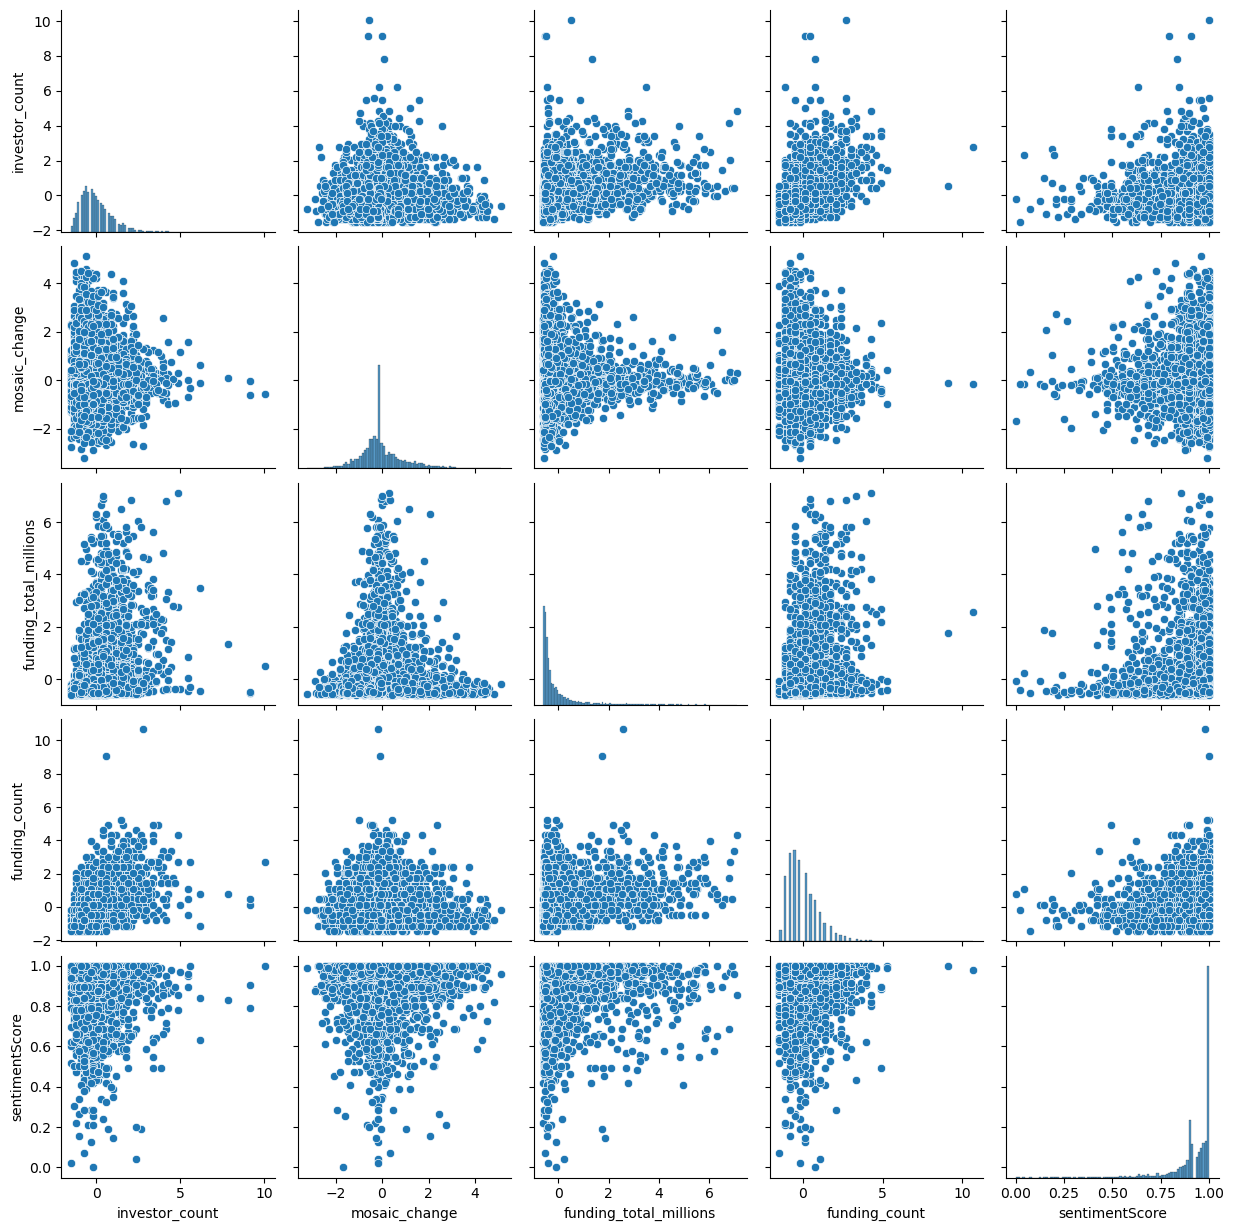

In [79]:
sns.pairplot(df3_normalized)
plt.show()

We can see some potentially positive relationships, especially between funding count and investor count. This intuitively makes sense, as you would expect more rounds of funding as the number of investors increased. Overall though, the data looks very scattered with very little indication of linearity between any of the numerical variables. We would perhaps expect that more investors and more total funding, for example, would have a stonger positive relationship. We see this somewhat, but it does not appear to be a very strong linear relationship. This does not bode well for future model-building. Let's look at a heatmap showing correlation coefficients between each numerical variable: 

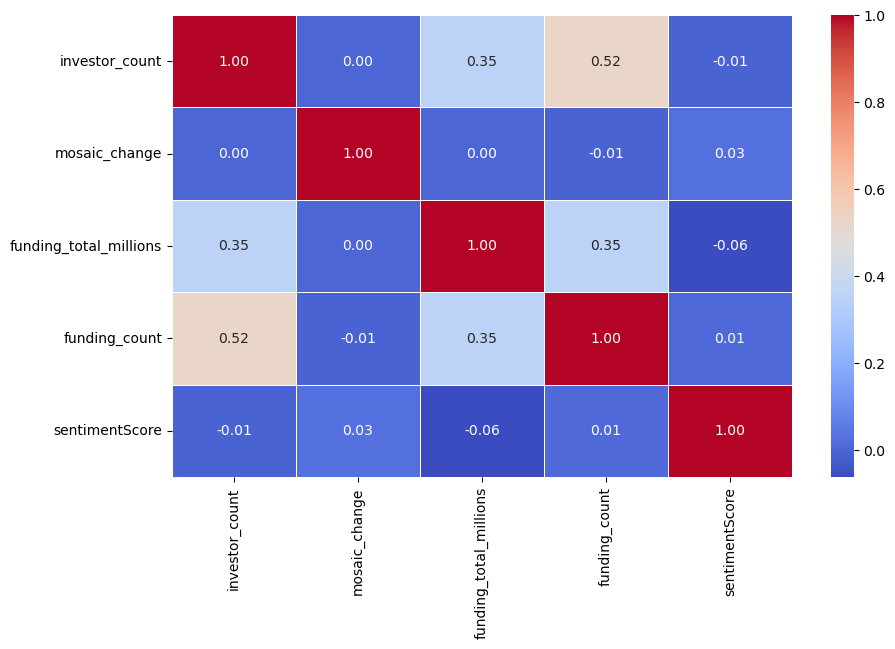

In [81]:
# Calculate the correlation matrix
corr_matrix = df3_normalized.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

This heatmap shows color-coded correlation coefficients between each numerical variable, with a stronger correlation being the most red, and the weakest being the most blue. We immediatelly notice how most of the heatmap is very blue, with almost no correlation between most variables (with extremely small coefficients, a few even being 0). We see a moderate positive correlation between funding count and investor count, and a weak positive correlation between total funding and funding count and total funding and investor count. But most variables appear to be as uncorrelated as possible. Again, this will prove to be a problem for further model-building and analysis, and we may need to explore other sources of data to create effective models. 